<a href="https://colab.research.google.com/github/howsam/pytorch-course-free/blob/main/week_3_linear_regression_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='#FFE15D'><b>💎 Week 3: Linear Regression with Autograd System</b></font>
### Pytorch Free Course [webpage](https://howsam.org/downloads/pytorch-courset/)

### Source Codes on Github [pytorch-course-free](https://github.com/howsam/pytorch-course-free.git)

### by Howsam AI Academy www.howsam.org


## ◀️ **Recap 👀**

<font size=5>PyTorch is a python package that provides two high-level features:</font>
*   <font size=5>Tensor computation (<font size=5 color="EE4E4E">like numpy</font>) with strong <font size=5 color="F4CE14">GPU</font> acceleration</font>
*   <font size=5><font size=5 color="3AA6B9">Deep Neural Networks</font> built on a tape-based <font size=5 color="F075AA">autograd</font> system</font>

<font size=5>✅ **Week 1**: Torch as Numpy </font>

<font size=5>✅ **Week 2**: Linear Regression with Torch API </font>

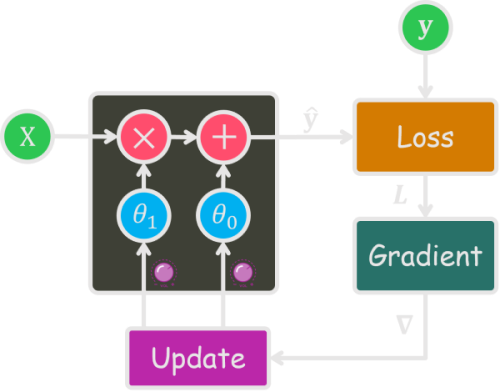

<font size=5><font size=6 color="EE4E4E">**Five**</font> Main Steps of the Training Procedure:</font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>1️⃣ Data </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>2️⃣ Model </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>3️⃣ Loss </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>4️⃣ Gradient </font>

&nbsp; &nbsp; &nbsp; &nbsp;<font size=5>5️⃣ Update </font>


## 🟪 **Increasing the output font size in Colab cells**

In [ ]:
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 30px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [ ]:
a = 3
a

3

## 🟥 **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch

In [ ]:
torch.__version__

'2.3.0+cu121'

## 🟥 **Section 1: Dataset & DataLoader**

https://www.kaggle.com/code/ybifoundation/simple-linear-regression

<table border="1" align="left">
  <tr>
    <th align="center">Experience Years</th>
    <th align="center">Salary</th>
  </tr>
  <tr>
    <td align="center">1.1</td>
    <td align="center">39343</td>
  </tr>
  <tr>
    <td align="center">1.2</td>
    <td align="center">42774</td>
  </tr>
  <tr>
    <td align="center">1.3</td>
    <td align="center">46205</td>
  </tr>
  <tr>
    <td align="center">...</td>
    <td align="center">...</td>
  </tr>
  <tr>
    <td align="center">10.3</td>
    <td align="center">122391</td>
  </tr>
  <tr>
    <td align="center">10.5</td>
    <td align="center">121872</td>
  </tr>
</table>


### ◀️ **Recap 👀**

In [ ]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

X = salary['Experience Years'].values
y = salary['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

plt.scatter(X_train, y_train, s=100)
plt.scatter(X_test, y_test, s=100)
plt.legend(['Train', 'Test']);

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

### 🟧 **Pytorch**

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

#### ⬜ **`TensorDataset()`**

In [ ]:
x = torch.arange(10, 20)
y = torch.arange(30, 40)
x, y

(tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 tensor([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))

In [ ]:
dataset = TensorDataset(x, y)
dataset

In [ ]:
dataset[5:10]

(tensor([15, 16, 17, 18, 19]), tensor([35, 36, 37, 38, 39]))

In [ ]:
dataset.tensors[0], dataset.tensors[1]

(tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 tensor([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))

#### ⬜ **`DataLoader()`**

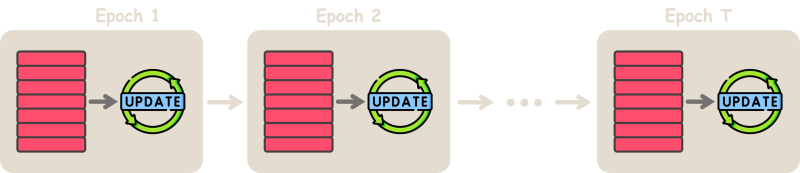

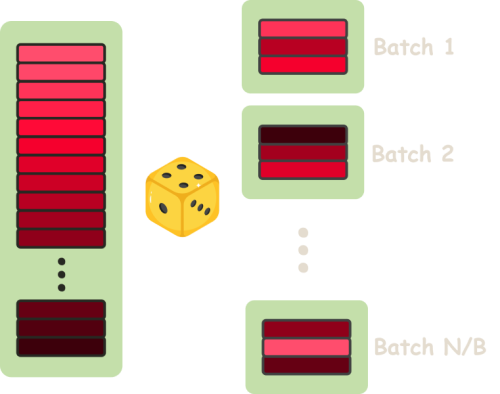

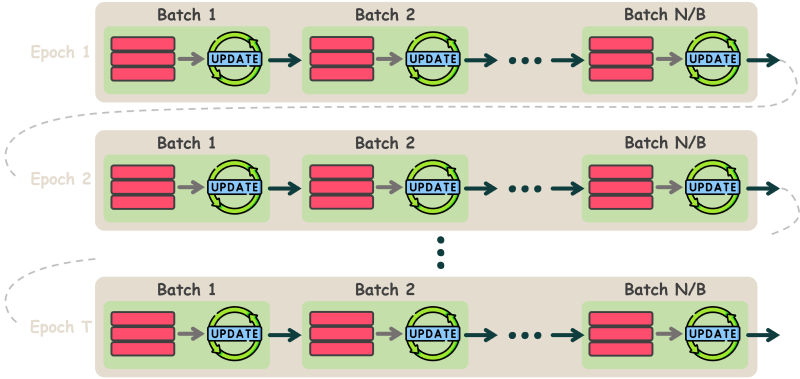

In [ ]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)#, drop_last=True)
dataloader

In [ ]:
x, y

(tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 tensor([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))

In [ ]:
for batch in dataloader:
  print(batch)
  print()

[tensor([11, 16, 13]), tensor([31, 36, 33])]

[tensor([19, 18, 10]), tensor([39, 38, 30])]

[tensor([14, 15, 12]), tensor([34, 35, 32])]

[tensor([17]), tensor([37])]



In [ ]:
next(iter(dataloader))

[tensor([15, 19, 16]), tensor([35, 39, 36])]

In [ ]:
iter_dataloader = iter(dataloader)

In [ ]:
next(iter_dataloader)

[tensor([11, 17, 12]), tensor([31, 37, 32])]

### 🟧 **Dataset with pytorch**

torch.Size([28, 1]) torch.Size([28, 1]) torch.Size([12, 1]) torch.Size([12, 1])


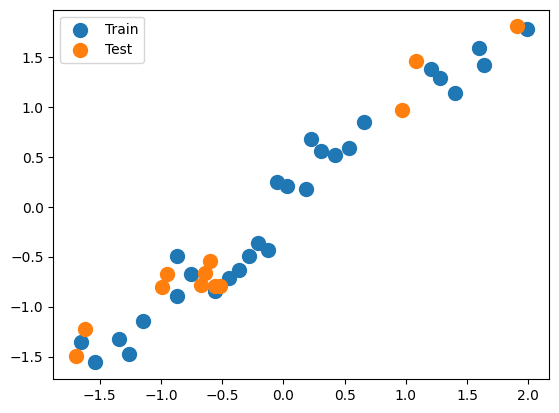

In [ ]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

X = salary['Experience Years'].values
y = salary['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

plt.scatter(X_train, y_train, s=100)
plt.scatter(X_test, y_test, s=100)
plt.legend(['Train', 'Test']);

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)
train_set[0], test_set[0]

((tensor([1.5966]), tensor([1.5896])), (tensor([-0.5975]), tensor([-0.5467])))

In [ ]:
train_loader = DataLoader(train_set, batch_size=5, shuffle=True)
test_loader = DataLoader(test_set, batch_size=5)

In [ ]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([5, 1]), torch.Size([5, 1]))

In [ ]:
x_batch, y_batch = next(iter(test_loader))
x_batch.shape, y_batch.shape

(torch.Size([5, 1]), torch.Size([5, 1]))

## 🟥 **Section 2: Model**

### ◀️ **Recap 👀**

In [ ]:
def linear_regression(x, theta0, theta1):
  y_hat = x * theta1 + theta0
  return y_hat

In [ ]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

y_hat = linear_regression(X_train, theta0, theta1)
y_hat.shape

In [ ]:
class LinearRegression:

  def __init__(self):
    self.theta0 = torch.randn(1)
    self.theta1 = torch.randn(1)

  def __call__(self, x):
    y_hat = x * self.theta1 + self.theta0
    return y_hat

  def __repr__(self):
    return "Linear Regression by Howsam AI"

In [ ]:
model = LinearRegression()
model.theta0, model.theta1

### 🟧 **Pytorch**

In [ ]:
import torch.nn as nn

In [ ]:
x_sample = torch.randn(5, 3)
x_sample

tensor([[ 1.5094,  1.2981, -0.2153],
        [ 0.6767,  0.4312,  0.5780],
        [ 2.6180, -0.6506, -1.4630],
        [-0.6650, -1.3465, -0.3578],
        [ 0.7176,  0.4949, -0.9653]])

In [ ]:
linear_regression = nn.Linear(in_features=3, out_features=1, )
linear_regression

Linear(in_features=3, out_features=1, bias=True)

In [ ]:
linear_regression(x_sample)

tensor([[-0.1048],
        [ 0.1075],
        [-1.2119],
        [-0.9011],
        [-0.7561]], grad_fn=<AddmmBackward0>)

In [ ]:
linear_regression.weight, linear_regression.bias

(Parameter containing:
 tensor([[0.0485, 0.2305, 0.5704]], requires_grad=True),
 Parameter containing:
 tensor([-0.3544], requires_grad=True))

### 🟧 **Linear regression model for salary dataset**

In [ ]:
x_batch

tensor([[-0.5975],
        [-0.6759],
        [ 1.0873],
        [-0.6367],
        [-0.9501]])

In [ ]:
linear_regression = nn.Linear(in_features=1, out_features=1, bias=False)
linear_regression

Linear(in_features=1, out_features=1, bias=False)

In [ ]:
linear_regression(x_batch)

tensor([[ 0.0620],
        [ 0.0701],
        [-0.1128],
        [ 0.0661],
        [ 0.0986]], grad_fn=<MmBackward0>)

In [ ]:
linear_regression.weight, linear_regression.bias

(Parameter containing:
 tensor([[-0.1037]], requires_grad=True),
 None)

## 🟥 **Section 3: Loss**

### ◀️ **Recap 👀**

In [ ]:
def mse(y_hat, y):
  return torch.mean((y_hat - y)**2)

loss = mse(y_hat, y_train)
loss

### 🟧 **Pytorch**

In [ ]:
loss_fn = nn.MSELoss()
loss_fn

MSELoss()

In [ ]:
x_batch, y_batch = next(iter(train_loader))
y_hat = linear_regression(x_batch)
loss_fn(y_hat, y_batch)

tensor(1.1373, grad_fn=<MseLossBackward0>)

In [ ]:
nn.functional.mse_loss(y_hat, y_batch)

tensor(1.1373, grad_fn=<MseLossBackward0>)

In [ ]:
nn.L1Loss()
nn.functional.l1_loss()

## 🟥 **Section 4: Gradient**

### ◀️ **Recap 👀**

In [ ]:
def calc_gradient(x, y, y_hat):
  error = y_hat - y
  grad_theta0 = 2*torch.mean(error)
  grad_theta1 = 2*torch.mean(x*error)
  return grad_theta0, grad_theta1

### 🟧 **Pytorch**

#### 🟨 **Example 1**

In [ ]:
x = torch.tensor(1.)
y = x**2
y

tensor(1.)

In [ ]:
dydx = 2*x
dydx

tensor(2.)

In [ ]:
x = torch.tensor(1.5, requires_grad=True)
print(x.grad)
y = x**2
y.backward()
x.grad

None


tensor(3.)

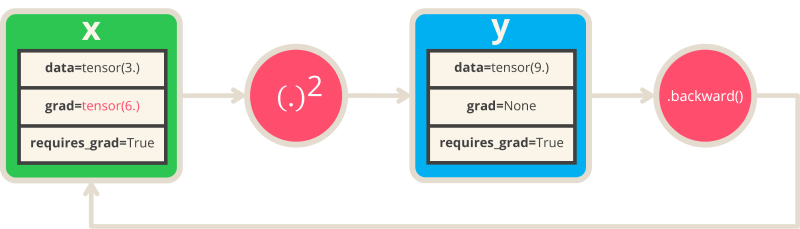

#### 🟨 **Example 2**

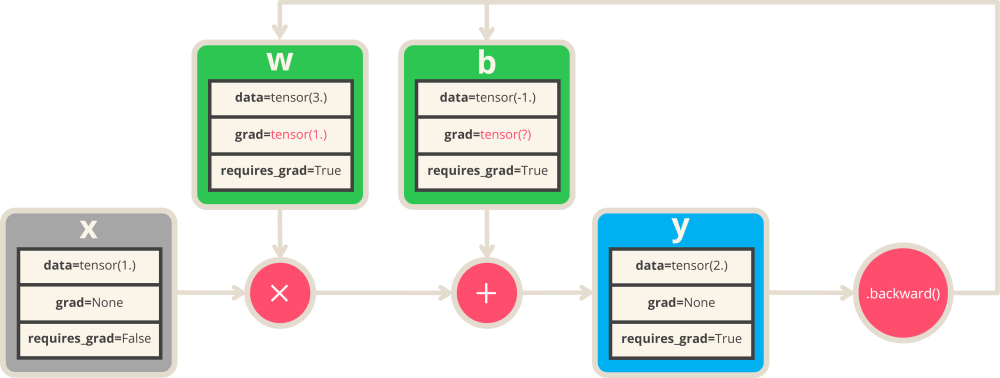

In [ ]:
x = torch.tensor(1.)
w = torch.tensor(3., requires_grad=True)
b = torch.tensor(-1., requires_grad=True)
y_hat = x * w + b
y_hat.backward()
x.grad, w.grad, b.grad

(None, tensor(1.), tensor(1.))

#### 🟨 **Example 3**

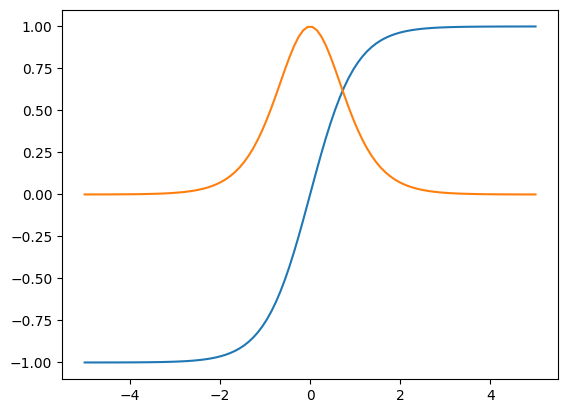

In [123]:
x = torch.linspace(-5, 5, 100)
x.requires_grad_(True)
# print(x.requires_grad)
y = torch.tanh(x)
# print(y.requires_grad)

y.backward(torch.ones_like(x))
# print(x.grad)

plt.plot(x.detach(), y.detach());
plt.plot(x.detach(), x.grad);

### 🟧 **Linear regression model for salary dataset**

In [127]:
x_batch, y_batch = next(iter(train_loader))
y_hat = linear_regression(x_batch)
print(y_hat, linear_regression.weight)
loss = loss_fn(y_hat, y_batch)
loss.requires_grad

tensor([[ 0.0904],
        [-0.1250],
        [ 0.0457],
        [ 0.0213],
        [ 0.1595]], grad_fn=<MmBackward0>) Parameter containing:
tensor([[-0.1037]], requires_grad=True)


True

In [128]:
x_batch, y_batch = next(iter(train_loader))
y_hat = linear_regression(x_batch)
loss = loss_fn(y_hat, y_batch)
loss.backward()

In [131]:
linear_regression.weight.grad#, linear_regression.bias.grad

tensor([[-0.3937]])

## 🟥 **Section 5: Update**

### ◀️ **Recap 👀**

In [ ]:
def update(theta0, theta1, eta, grad_theta0, grad_theta1):
  theta0 -= eta * grad_theta0
  theta1 -= eta * grad_theta1
  return theta0, theta1

### 🟧 **Pytorch**

In [132]:
from torch.optim import SGD

In [134]:
optimizer = SGD(linear_regression.parameters(), lr=0.5, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.5
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [139]:
x_batch, y_batch = next(iter(train_loader))
y_hat = linear_regression(x_batch)
loss = loss_fn(y_hat, y_batch)
loss.backward()
print(linear_regression.weight, linear_regression.bias)
print(linear_regression.weight.grad)
optimizer.step()
optimizer.zero_grad()
print(linear_regression.weight, linear_regression.bias)
print(linear_regression.weight.grad)

Parameter containing:
tensor([[7.2802]], requires_grad=True) None
tensor([[11.7977]])
Parameter containing:
tensor([[5.3523]], requires_grad=True) None
None


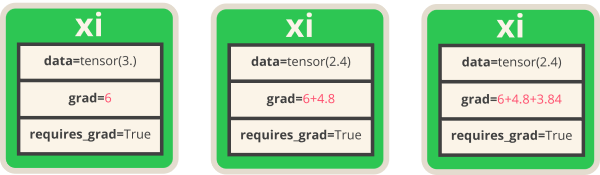

In [ ]:
x_batch, y_batch = next(iter(train_loader))
y_hat = linear_regression(x_batch)
loss = loss_fn(y_hat, y_batch)
loss.backward()
optimizer.step()
optimizer.zero_grad()

## 🟥 **Train & Test**

### ◀️ **Recap 👀**

In [ ]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

eta = 0.1
N = 100

for iter in range(N):
  # model
  y_hat = linear_regression(X_train, theta0, theta1)

  # loss
  loss = mse(y_hat, y_train)

  # gradient
  grad_theta0, grad_theta1 = calc_gradient(X_train, y_train, y_hat)

  # update
  theta0, theta1 = update(theta0, theta1, eta, grad_theta0, grad_theta1)

  print(f'Iter: {iter}/{N} , Loss: {loss:.2f} , g_th0: {grad_theta0:.2f} , g_th1: {grad_theta1:.2f} , th0: {theta0.item():.2f} , th1: {theta1.item():.2f}')

In [ ]:
y_hat = linear_regression(X_test, theta0, theta1)
mse(y_hat, y_test)

### 🟧 **Train**

#### 🟨 **Step 1: Dataset**

In [140]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

X = salary['Experience Years'].values
y = salary['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=5, shuffle=True)
test_loader = DataLoader(test_set, batch_size=5)

#### 🟨 **Step 2: Model**

In [151]:
model = nn.Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

#### 🟨 **Step 3: Loss**

In [142]:
loss_fn = nn.MSELoss()

#### 🟨 **Step 4: Optimizer**

In [152]:
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

#### 🟨 **Step 5: Train Loop**

In [148]:
n_epochs = 50

In [154]:
for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:

    # model
    y_hat = model(x_batch)

    # loss
    loss = loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    print(loss.item())

0.055098094046115875
0.03377329930663109
0.06761953979730606
0.048965245485305786
0.03943547606468201
0.05261238291859627
0.042672306299209595
0.02929014526307583
0.04080944508314133
0.08768172562122345
0.024530349299311638
0.09171182662248611
0.06102478504180908
0.06110839918255806
0.038864314556121826
0.03992350399494171
0.05687147378921509
0.024894416332244873
0.05521754175424576
0.05391182750463486
0.0396655797958374
0.05615564063191414
0.05366327241063118
0.030188532546162605
0.0036855307407677174
0.06315316259860992
0.05057037994265556
0.04908265173435211
0.08427063375711441
0.045864347368478775
0.02565825544297695
0.033640772104263306
0.037609465420246124
0.09974981844425201
0.054808538407087326
0.04155287146568298
0.06483764946460724
0.04048870876431465
0.02016625739634037
0.07356139272451401
0.05596419423818588
0.034713368862867355
0.05136164277791977
0.05895169824361801
0.03027026355266571
0.03588058799505234
0.06083191558718681
0.06319576501846313
0.030235687270760536
0.0547

In [155]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.9757]], requires_grad=True),
 Parameter containing:
 tensor([0.0128], requires_grad=True))

### 🟧 **Test**

In [157]:
with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
    error = nn.functional.l1_loss(y_hat, y_batch)
    print(error)


tensor(0.1221)
tensor(0.2554)
tensor(0.1348)
